**NGUYỄN BÁ ĐỨC - DATA SCIENCE TALENT COMPETITION 2024**

**1. LOAD DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_customer = pd.read_csv('/content/drive/MyDrive/Dataset/dstc2024/03_Customer_Behavior_Data.csv')
df_item = pd.read_csv('/content/drive/MyDrive/Dataset/dstc2024/03_Item_Information_Data.csv')
df_shelf = pd.read_csv('/content/drive/MyDrive/Dataset/dstc2024/03_Shelf_Information_Data.csv')

**2. DATA CLEANNING**

- Picking up item: Có hay không hành động nhặt sản phẩm lên
- Returning item: Có hay không hành động trả lại sản phẩm vào kệ hàng
- Putting item into bag: Có hay không hành động đặt sản phẩm vào giỏ hàng
- Taking item out of bag: Có hay không hành động đặt sản phẩm vào giỏ hàng rồi nhưng lại lấy ra
- Putting item into bag in the 2nd time: Có hay không hành động đã trả sản phẩm vào kệ rồi nhưng lại lấy sản phẩm ra

1. Nếu bỏ hàng vào túi lần 2, thì chắc chắn đã phải bỏ vào túi lần 1 và lấy ra khỏi túi.


In [4]:
for index, row in df_customer.iterrows():
    if row["Putting item into bag in the 2nd time"] == True:
        # Sửa lỗi (tùy chọn)
        df_customer.loc[index, "Taking item out of bag"] = True
        df_customer.loc[index, "Putting item into bag"] = True

2. Nếu không cầm sản phẩm lên thì làm gì có mấy cái đằng sau? -> cho false hết mấy cái sau

In [5]:
for index, row in df_customer.iterrows():
    if row["Picking up item"] == False:
        # Sửa lỗi (tùy chọn)
        df_customer.loc[index, "Returning item"] = False
        df_customer.loc[index, "Putting item into bag"] = False
        df_customer.loc[index, "Taking item out of bag"] = False
        df_customer.loc[index, "Putting item into bag in the 2nd time"] = False

3. Đã trả lại sản phẩm vào kệ hàng rồi , thế đ nào lại cho vào túi được vậy?

In [6]:
for index, row in df_customer.iterrows():
    if row["Returning item"] == True:
        # Sửa lỗi (tùy chọn)
        df_customer.loc[index, "Putting item into bag"] = False
        df_customer.loc[index, "Taking item out of bag"] = False
        df_customer.loc[index, "Putting item into bag in the 2nd time"] = False

4. Không cầm giỏ hàng -> Không thể bỏ vào giỏ hàng -> Không thể lấy ra khỏi giỏ hàng -> Không thể mua

In [7]:
for index, row in df_customer.iterrows():
    if row["Holding the bag"] == False:
        # Sửa lỗi (tùy chọn)
        df_customer.loc[index, "Putting item into bag"] = False
        df_customer.loc[index, "Taking item out of bag"] = False
        df_customer.loc[index, "Putting item into bag in the 2nd time"] = False

5. Lấy ra khỏi giỏ hàng kiểu gì khi không có sản phẩm trong giỏ hàng?

In [8]:
for index, row in df_customer.iterrows():
    if row["Taking item out of bag"] == True & row["Putting item into bag"] == False:
        # Sửa lỗi (tùy chọn)
        df_customer.loc[index, "Putting item into bag"] = True

6. Điền NaN trong 'Taking item out of bag' thành False ( theo hướng tích cực là ko bỏ hàng khỏi túi )
Thay cả NaN trong 'Putting item into bag in the 2nd time' thành False ( vì t thích thế )

In [9]:
df_customer['Taking item out of bag'] = df_customer['Taking item out of bag'].fillna(False)
df_customer['Putting item into bag in the 2nd time'] = df_customer['Putting item into bag in the 2nd time'].fillna(False)

**3. ANALYZE**

***Overview***

In [10]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shelf ID                               15394 non-null  int64  
 1   Person ID                              15394 non-null  int64  
 2   Timestamp                              15394 non-null  int64  
 3   Age                                    15394 non-null  int64  
 4   Gender                                 15394 non-null  object 
 5   Height                                 15394 non-null  int64  
 6   Weight                                 15394 non-null  int64  
 7   Married status                         15394 non-null  object 
 8   Moving speed (m/s)                     15394 non-null  float64
 9   Item ID                                15394 non-null  int64  
 10  Looking at item (s)                    15394 non-null  int64  
 11  Ho

In [11]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shelf ID            134 non-null    int64  
 1   Item ID             134 non-null    int64  
 2   Name                134 non-null    object 
 3   Origin              134 non-null    object 
 4   Location            134 non-null    object 
 5   Weight (g)          110 non-null    float64
 6   Price               134 non-null    object 
 7   NSX                 100 non-null    object 
 8   HSD                 100 non-null    object 
 9   Marketing strategy  134 non-null    bool   
 10  Discount            134 non-null    int64  
 11  Rate                134 non-null    int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 11.8+ KB


In [12]:
df_shelf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Shelf ID             8 non-null      int64 
 1   Description          8 non-null      object
 2   Location_x (center)  8 non-null      int64 
 3   Location_y (center)  8 non-null      int64 
 4   Width                8 non-null      int64 
 5   Height               8 non-null      int64 
 6   Length               8 non-null      int64 
 7   Number of items      8 non-null      int64 
 8   Shape                8 non-null      object
dtypes: int64(7), object(2)
memory usage: 704.0+ bytes


**Câu 1:** (5đ) Thống kê 5 mặt hàng có tổng thời gian nhìn và cầm xem lâu nhất?

In [13]:
# Calculate interaction time
df_customer['Total time (s)'] = df_customer['Looking at item (s)'] + df_customer['Holding the item (s)']

# Group by Item ID and sum interaction times
top_items = df_customer.groupby(['Item ID','Shelf ID'])['Total time (s)'].sum().sort_values(ascending=False).head(5)

top_items = top_items.reset_index()

top_items_with_name = pd.merge(top_items, df_item[['Item ID', 'Shelf ID', 'Name']], on=['Item ID', 'Shelf ID'], how='left')


print(top_items_with_name)

   Item ID  Shelf ID  Total time (s)                  Name
0        7         7           22896   Sữa chua uống Probi
1        6         7           22896  Sữa chua uống Yakult
2        8         2           13939           Sữa ông thọ
3        6         0           13866         Bim bim Oishi
4        7         0           13362  Snack khoai tây Lays


**Câu 2:** (5đ) Thống kê 5 mặt hàng thường được cầm lên rồi trả lại nhiều nhất?

In [14]:
df_customer['Interaction'] = (df_customer['Picking up item'] == True) & (df_customer['Returning item'] == True)

top_items = df_customer.groupby(['Item ID','Shelf ID'])['Interaction'].sum().sort_values(ascending=False).head(5)

top_items = top_items.reset_index()

top_items_with_name = pd.merge(top_items, df_item[['Item ID', 'Shelf ID', 'Name']], on=['Item ID', 'Shelf ID'], how='left')


print(top_items_with_name)

   Item ID  Shelf ID  Interaction                           Name
0        2         2          134  4 hộp sữa lúa mạch Milo 180ml
1        7         0          127           Snack khoai tây Lays
2       12         7          117                   Mý ý SG Food
3       14         7          116                Nước lẩu Barona
4        2         7          114               Sữa chua Vinamik


--- Mặt hàng được xem là “được mua” khi mặt hàng đấy được bỏ vào giỏ hàng và không được lấy ra. ---
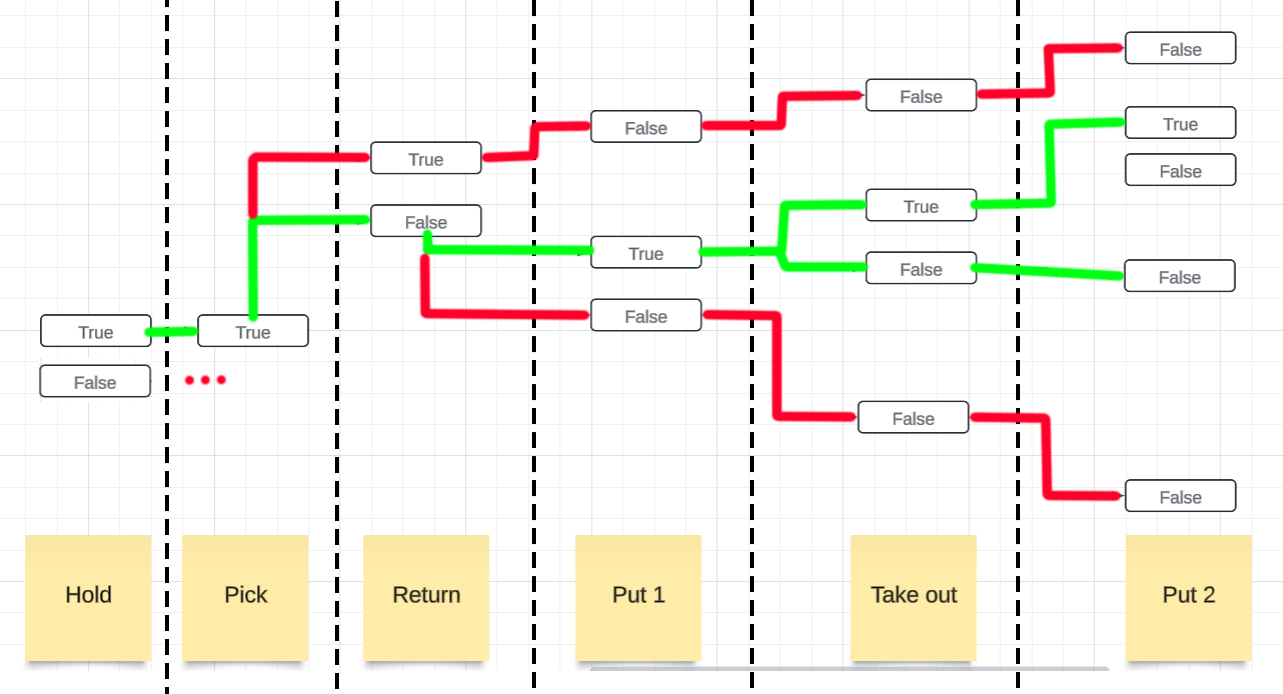

In [15]:
df_purchased = df_customer[((df_customer['Holding the bag'] == True) & (df_customer['Picking up item'] == True) &
                            (df_customer['Returning item'] == False) & (df_customer['Putting item into bag'] == True) &
                            (df_customer['Taking item out of bag'] == True) & (df_customer['Putting item into bag in the 2nd time'] == True)) |
                            ((df_customer['Holding the bag'] == True) & (df_customer['Picking up item'] == True) &
                            (df_customer['Returning item'] == False) & (df_customer['Putting item into bag'] == True) &
                            (df_customer['Taking item out of bag'] == False) & (df_customer['Putting item into bag in the 2nd time'] == False))]

**Câu 3**: (5đ) Các nhóm khách hàng theo độ tuổi (Thiếu niên: 18 - 30; Trung niên: 31 - 60; Cao
tuổi: > 60) mua mặt hàng nào nhiều nhất?

In [16]:
df_purchased.loc[:, 'Age Group'] = pd.cut(df_purchased['Age'], bins=[18, 30, 60, 100],
                                         labels=['Thiếu niên', 'Trung niên', 'Cao tuổi'])

# Nhóm theo 'Shelf ID', 'Item ID' và 'Age Group', sau đó đếm số lượng giao dịch
item_counts = df_purchased.groupby(['Shelf ID', 'Item ID', 'Age Group'], observed=False).size().reset_index(name='Count')

# Tìm ra mặt hàng (Shelf ID, Item ID) được mua nhiều nhất cho mỗi nhóm tuổi
most_purchased_items = item_counts.loc[item_counts.groupby('Age Group')['Count'].idxmax()]

most_purchased_items_with_name = pd.merge(most_purchased_items, df_item[['Shelf ID', 'Item ID', 'Name']], on=['Shelf ID', 'Item ID'], how='left')

most_purchased_items_with_name

<ipython-input-16-6da40f2da4a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchased.loc[:, 'Age Group'] = pd.cut(df_purchased['Age'], bins=[18, 30, 60, 100],
<ipython-input-16-6da40f2da4a6>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_purchased_items = item_counts.loc[item_counts.groupby('Age Group')['Count'].idxmax()]


,Shelf ID,Item ID,Age Group,Count,Name
0,0,4,Thiếu niên,41,Bánh trứng Custard
1,2,1,Trung niên,85,Lốc 4 hộp sữa tươi ít đường TH true MILK
2,0,4,Cao tuổi,48,Bánh trứng Custard


**Câu 4: (5đ) Ngày nào trong tuần có doanh thu cao nhất?**

In [17]:
df_purchased['Date'] = pd.to_datetime(df_purchased['Timestamp'], unit='s').dt.strftime('%Y-%m-%d')
df_purchased['Day of Week'] = pd.to_datetime(df_purchased['Date']).dt.day_name()

<ipython-input-17-ae76cb31d976>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchased['Date'] = pd.to_datetime(df_purchased['Timestamp'], unit='s').dt.strftime('%Y-%m-%d')
<ipython-input-17-ae76cb31d976>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchased['Day of Week'] = pd.to_datetime(df_purchased['Date']).dt.day_name()


In [18]:
df_purchased.head(1)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Total time (s),Interaction,Age Group,Date,Day of Week
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,True,False,True,True,True,63,False,Trung niên,2024-07-06,Saturday


In [19]:
df_item.head(1)

,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0,0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4


In [20]:
df_item['Price'] = df_item['Price'].astype(str).str.replace(',', '').str.replace('₫', '').astype(int)

In [21]:
df_item.head(1)

,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0,0,Bánh Oreo,Vietnam,Cao,120.0,17500,2023-11-14,2024-10-17,False,10,4


In [24]:
unique1 = df_purchased['Date'].unique()
unique2 = df_purchased['Day of Week'].unique()

print(unique1)
print(unique2)

['2024-07-06' '2024-07-07' '2024-07-08' '2024-07-01' '2024-07-02'
 '2024-07-03' '2024-07-04' '2024-07-05']
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


Câu hỏi là ngày nào trong tuần -> Chỉ xét trong 1 tuần
-> Xét từ 1/7/2024 (thứ 2) cho tới 7/7/2024 (cn). Bỏ qua 8/7/2024

In [25]:
item_counts = df_purchased.groupby(['Shelf ID', 'Item ID', 'Date', 'Day of Week' ], observed=False).size().reset_index(name='Count')

price_counts = pd.merge(item_counts, df_item[['Shelf ID', 'Item ID','Price']], on=['Shelf ID', 'Item ID'], how='left')
price_counts['Total Price'] = price_counts['Count'] * price_counts['Price']

price_counts = price_counts.groupby(['Date', 'Day of Week' ], observed=False)['Total Price'].sum().reset_index()

price_counts = price_counts.sort_values('Total Price', ascending=False)

print(price_counts)

         Date Day of Week  Total Price
5  2024-07-06    Saturday    238055100
6  2024-07-07      Sunday    228731200
3  2024-07-04    Thursday     76546100
1  2024-07-02     Tuesday     68498000
4  2024-07-05      Friday     59552500
2  2024-07-03   Wednesday     49291500
7  2024-07-08      Monday     31663000
0  2024-07-01      Monday     19344700


-------> Thứ 7 có DOANH THU cao nhấtttttttttt

**Câu 5: Trong 3 nhóm tuổi sau: Thiếu niên (18 - 30), Trung niên (31 - 60), Cao tuổi: (> 60),nhóm tuổi nào có *số người* đi siêu thị nhiều nhất?**

In [26]:
df_customer.head(1)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Total time (s),Interaction
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,27,36,True,True,False,True,True,True,63,False


In [28]:
df_customer.loc[:, 'Age Group'] = pd.cut(df_purchased['Age'], bins=[18, 30, 60, float('inf')],
                                         labels=['Thiếu niên (18-30)', 'Trung niên (31-60)', 'Cao tuổi (>60)'])

# Count the number of unique persons in each age group
age_group_counts = df_customer.groupby('Age Group')['Person ID'].nunique().sort_values(ascending=False)
age_group_counts

<ipython-input-28-3a2e184bf288>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_customer.groupby('Age Group')['Person ID'].nunique().sort_values(ascending=False)


,Person ID
Age Group,
Trung niên (31-60),554
Cao tuổi (>60),298
Thiếu niên (18-30),234


-------> Người trung niên (31-60) có số lượng người đi siêu thị cao nhấtttttttt

**Câu 6: (5đ) Top 5 các mặt hàng giảm giá được người dùng mua nhiều nhất?**



In [29]:
discounted_items = df_item[df_item['Discount '] > 0]

item_counts = df_purchased.groupby(['Shelf ID', 'Item ID'], observed=False).size().reset_index(name='Count')

merged_data = pd.merge(item_counts, discounted_items, on=['Shelf ID', 'Item ID'])

merged_data.sort_values(by='Count', ascending=False, inplace=True)

top_5_items = merged_data.head(5)

top_5_items[['Shelf ID','Item ID','Name','Price','Discount ','Count']]


,Shelf ID,Item ID,Name,Price,Discount,Count
1,0,4,Bánh trứng Custard,17000,10,163
58,7,0,Kem tràng tiền,45700,5,155
18,2,7,Sữa bột Milo,60000,15,150
8,1,1,Dầu gội Romano,122000,25,99
15,1,11,Khăn mặt Shine,23000,20,94


Câu 7: (5đ) Top 5 các mặt hàng được chạy quảng cáo được người dùng mua nhiều nhất?

In [30]:
marketing_items = df_item[df_item['Marketing strategy'] == True]

item_counts = df_purchased.groupby(['Shelf ID', 'Item ID'], observed=False).size().reset_index(name='Count')

merged_data = pd.merge(item_counts, marketing_items, on=['Shelf ID', 'Item ID'])

merged_data.sort_values(by='Count', ascending=False, inplace=True)

top_5_items = merged_data.head(5)

top_5_items[['Shelf ID','Item ID','Name','Price','Count']]

,Shelf ID,Item ID,Name,Price,Count
0,0,4,Bánh trứng Custard,17000,163
15,7,0,Kem tràng tiền,45700,155
5,2,7,Sữa bột Milo,60000,150
3,1,11,Khăn mặt Shine,23000,94
1,1,2,Dầu gội Dove,166000,89


Câu 8: (6đ) Top 3 quầy hàng có thời lượng trung bình quan tâm đến sản phẩm, trên số lượt tương tác, là lâu nhất (quan tâm tương ứng với việc nhìn và cầm xem)?

In [31]:
df_customer.head(1)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Total time (s),Interaction,Age Group
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,...,36,True,True,False,True,True,True,63,False,Trung niên (31-60)


In [32]:
avg_interaction_time = df_customer.groupby('Shelf ID')['Total time (s)'].mean().sort_values(ascending=False)

merged_data = pd.merge(avg_interaction_time, df_shelf , on=['Shelf ID'])

top_3_shelves = merged_data.head(3)

top_3_shelves[['Shelf ID','Total time (s)','Description','Number of items','Shape']]

,Shelf ID,Total time (s),Description,Number of items,Shape
0,5,62.260184,Quầy gia dụng,16,Kệ hàng
1,7,61.009985,Quầy đông lạnh,16,Kệ hàng
2,3,59.845622,Quầy thực phẩm,25,Kệ hàng


Câu 9: (7đ) Top 3 quầy hàng có số sản phẩm được mua nhiều nhất?

In [33]:
item_counts = df_purchased.groupby(['Shelf ID'], observed=False).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

merged_data = pd.merge(item_counts, df_shelf , on=['Shelf ID'])

top_3_shelves = merged_data.head(3)

top_3_shelves[['Shelf ID','Count','Description','Number of items','Shape']]

,Shelf ID,Count,Description,Number of items,Shape
0,1,1174,Quầy hoá mỹ phẩm,18,Kệ hàng
1,7,1139,Quầy đông lạnh,16,Kệ hàng
2,0,985,Quầy bánh kẹo,13,Quầy tròn


**Câu 10: (8đ) Người dùng có thói quen di chuyển giữa 2 quầy hàng nào nhiều nhất?**

Tạo ma trận 2 chiều 8 x 8, 1 chiều là quầy đi , 1 chiều là quầy đến và thống kê lại số lần xuất hiện

In [35]:
transitions = df_customer[['Person ID', 'Shelf ID']].copy()
transitions['next_shelf'] = transitions['Shelf ID'].shift(-1)

# Tạo ma trận chuyển tiếp bằng cách đếm số lần xuất hiện của mỗi cặp quầy
matrix = transitions.groupby(['Shelf ID', 'next_shelf']).size().unstack(fill_value=0)

np.fill_diagonal(matrix.values, 0) # Để ko lấy phải trường hợp bị lặp

# # Tìm vị trí của giá trị lớn nhất trong ma trận
row_max, col_max = np.unravel_index(matrix.values.argmax(), matrix.shape)

print(f"Người dùng có thói quen di chuyển giữa quầy {col_max} đến quầy {row_max} nhiều nhất.")

matrix



Người dùng có thói quen di chuyển giữa quầy 7 đến quầy 0 nhiều nhất.


next_shelf,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Shelf ID,,,,,,,,
0,0,110,96,79,96,26,62,179
1,105,0,96,53,77,36,47,149
2,113,79,0,47,70,26,37,116
3,74,57,47,0,42,23,23,73
4,88,89,66,52,0,28,36,123
5,39,38,25,19,22,0,14,51
6,52,47,37,17,42,20,0,59
7,177,143,121,73,132,49,55,0
